In [5]:
import kernel_functions as kfn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn import metrics
import sklearn
import pandas as pd
from scipy import stats
from sklearn import cluster, linear_model
import itertools as iter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing as prep
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import feature_selection
from sklearn import tree
from sklearn.metrics import *
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit, cross_val_score
import re
from numpy import linalg

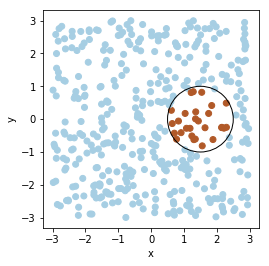

In [6]:
np.random.seed(0)
# create 400 points randomly distributed between -3 and 3 (along x and y)
X = np.random.uniform(-3,3,(400,2))

# points within a circle centered at (1.5, 0) of radius 1 are labeled class +1,
# and -1 otherwise
shift = 1.5
radius = 1
X_shift = X[:,0]-shift
R_shift = np.sqrt(X_shift**2 + X[:,1]**2)

# class labels
Y = np.asarray(map(lambda x: 1 if x else -1, R_shift < radius))

# plot 2-d data
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired)
fig = plt.gcf()
circle = plt.Circle((shift,0), radius, color='black', fill=False)
fig.gca().add_artist(circle)
fig.gca().set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
def map_func(x):
    """
    Map d-dimensional data to d+1-dimensions.  Return a numpy array of data points. 
    
    x : matrix, a collection of data points, shape = [n_samples, n_features]
    """
    if len(x.shape) == 1:
        # x contains only a single data point
        return np.r_[x, calc_z(x)]
    else:
        z = [np.r_[j, calc_z(j)] for j in x]
        return np.array(z)

def calc_z(x):
    """
    Take the dot product of an array with itself.
    
    x : array, shape = [1, n_features]
    """
    return np.dot(x, x.T)

def my_kernel(x1, x2):
    """
    Custom kernel to pass to sklearn svm.SVC via its kernel parameter
    
    x1 : matrix, a collection of data points, shape = [n_samples, n_features]
    x2 : matrix, a collection of data points, shape = [n_samples, n_features]
    """
    return np.dot(map_func(x1), map_func(x2).T)

def calc_plane_norm(sv, coef):
    """
    Calculate the normal to the hyperplane (in mapped space)
    
    sv : matrix, contains mapped points, shape = [n_supportvectors, n_mappedfeatures]
    coef : array of floats, shape = [n_supportvectors, 1]
    """ 
    components = coef[:, np.newaxis]*sv
    return np.sum(components, axis = 0)

def calc_z_plane(x):
    """
    Calculate z-coordinates of the decision plane
    
    x: matrix, shape = [n_samples, n_features]
    """
    return (-w[0]*x[0] - w[1]*x[1] - b)/w[2]

In [9]:
my_kernel_test=kfn.Kernel.linear()

In [10]:
num_samples=10 
num_features=2 
grid_size=20
samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
labels = 2 * (samples.sum(axis=1) > 0) - 1.0
#np.dot(X,Y)

In [16]:
def rolling_sum(df, period):
    ret = np.cumsum(df, axis=1, dtype=float)
    ret[:, period:] = ret[:, period:] - ret[:, :-period]
    return ret[:, period - 1:]
sample_test=pd.DataFrame(samples)[0]
pd.rolling_sum(sample_test,5).dropna()

/home/ak/Envs/DataAnalysis/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).sum()


4   -0.930153
5    0.240683
6    2.659500
7    1.830121
8    1.586882
9    1.546378
Name: 0, dtype: float64

In [25]:
def example(num_samples=1000, num_features=2, grid_size=20):
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    return samples, labels

In [27]:
###scaler types
sc= prep.StandardScaler()##replace this with other scalers to investigate performance
min_max_scaler = prep.MinMaxScaler()
max_abs_scaler = prep.MaxAbsScaler()
robust_scaler = prep.RobustScaler() #robust against outliers
dt = tree.DecisionTreeClassifier(criterion='entropy')
logistic=linear_model.LogisticRegression()

In [85]:
def map_func(x):
    """
    Map d-dimensional data to d+1-dimensions.  Return a numpy array of data points.

    x : matrix, a collection of data points, shape = [n_samples, n_features]
    """
    if len(x.shape) == 1:
        # x contains only a single data point
        return np.r_[x, calc_z(x)]
    else:
        z = [np.r_[j, calc_z(j)] for j in x]
        return np.array(z)
    
def my_kernel(x, y):
    offset=2
    sigma=0.2
    return np.exp(-linalg.norm(map_func(x) - map_func(y)) ** 2)

In [101]:
samples_test, labels_test =example()
print(samples.shape)
print(labels.shape)
labels_reshape=np.reshape(labels,(1))
print np.shape(labels_reshape[])

(10, 2)
(10, 1)
(1, 10)


In [94]:
np.dot(map_func(samples), map_func(labels))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [87]:
pipe_svc = Pipeline([('scl', max_abs_scaler),('clf', SVC(random_state=1))])
model = svm.SVC(kernel=my_kernel, C=10, tol=1e-3)
model.fit(samples,labels)
model.predict(samples)

IndexError: tuple index out of range

In [79]:
# predicted Y (on training set)
Ypred = model.predict(samples)

print("Classification report %s:\n%s\n"
      % (model, metrics.classification_report(labels, Ypred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels, Ypred))

Classification report SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00         5
        1.0       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        10


Confusion matrix:
[[5 0]
 [0 5]]


In [80]:
# coef : dual coefficients alpha_i*y_i per support vector in decision function
coef = model.dual_coef_[0]
# intercept in decision function
b = model.intercept_

# bug in sklearn versions before 0.16: https://github.com/scikit-learn/scikit-learn/issues/4262
# The first class to appear in the dataset, i.e. Y[0], is mapped to the class +1, even if it is labeled -1
version_check = re.match(r"0\.(\d+).", sklearn.__version__).group(1)
if np.sign(Y[0]) == -1 and int(version_check) < 16:
    coef = -coef

In [81]:
def plot(predictor, X, y, grid_size):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                         np.linspace(y_min, y_max, grid_size),
                         indexing='ij')
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 cmap=cm.Paired,
                 levels=[-0.001, 0.001],
                 extend='both',
                 alpha=0.8)
    plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
                c=flatten(y), cmap=cm.Pastel1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    #plt.savefig(filename)

In [82]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

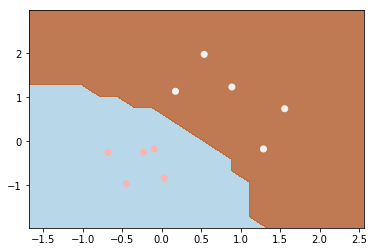

In [50]:
plot(model, samples, labels, grid_size)
plt.show()

In [51]:
# create mapped data points (from 2d to 3d)
Xm = map_func(X)

# Xm_sv is an array of the support vectors (in 3d)
# model.support_ contains the indices of the support vectors
Xm_sv = np.array([Xm[i] for i in model.support_])
w = calc_plane_norm(Xm_sv, coef)
print "The normal to the hyperplane is: \n {0}".format(w)

The normal to the hyperplane is: 
 [-0.6128597   0.73782036  3.17513568]


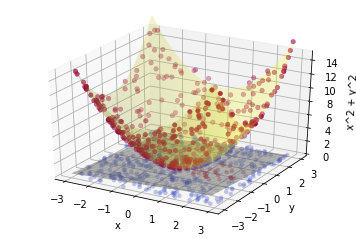

In [52]:
# zgrid corresponds to z coordinates of paraboloid in the mapped space
xgrid, ygrid = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))
zgrid = np.array(map(calc_z, np.c_[xgrid.ravel(), ygrid.ravel()]))
zgrid = zgrid.reshape(xgrid.shape)

fig2 = plt.figure()
ax = fig2.gca(projection='3d')

# zplane is the z coordinates of the hyperplane
zplane = np.array(map(calc_z_plane, np.c_[xgrid.ravel(), ygrid.ravel()]))
zplane = zplane.reshape(xgrid.shape)

# plot original points and highlight support vectors
ax.scatter(X[:,0], X[:,1], [0]*len(X[:,0]), c = Y, cmap='coolwarm', linewidth=0, alpha=0.3)
ax.scatter(X[model.support_, 0], X[model.support_, 1],[0]*len(model.support_), s=80, facecolors='none')

# plot decision boundary
ax.plot_surface(xgrid, ygrid, zplane, alpha=0.5, linewidth=0, color='grey')

# plot mapped points
ax.plot_surface(xgrid, ygrid, zgrid, alpha=0.2, linewidth=0, color='yellow')
ax.scatter(X[:,0], X[:,1], map(calc_z, X), c = Y, cmap='Spectral', linewidth=0.5)

ax.set_zlim([0,15])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('x^2 + y^2')
plt.axis('tight')
plt.show()